<a href="https://colab.research.google.com/github/balu337/LendingClubRepo/blob/master/LC_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LendingClub Project**

File contains details of Lendign Club Project. Project Objective is to come up with guidnec which can be used by Lending club team to identify Risk Loans.

## Step 1 : Project Stetup & Data Import

In [62]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#filepath="/content/drive/MyDrive/IITB_AIML/1_Statistics/LendingClubCaseStudy/loan.csv"
filepath="/content/drive/MyDrive/LendingClub/loan.csv"


df = pd.read_csv(filepath)

## **Step 2 : Analyze Raw Data**

Check column by column using Data Dictionary and get unerstanding the data ( content and type )

In [65]:
#Dataset Shape
df.shape

(39717, 111)

In [66]:
#Description of dataset
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [67]:
#Display information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [68]:
#Find datatypes of columns
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [69]:
#Get All Column Names

col= list(df.columns)
print("# Columns are ", len(col))
print("Columns are ", col)

# Columns are  111
Columns are  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open

### Creating new dataframe for Analysis

In [70]:
#Removing unwanted columns

# #After basic analysis columns after [ annual_inc_joint ] are not useful as there is not data.

# print("-->",col[53])
# columns_removed=col[53:]
# print("removed col ",columns_removed)
# df1=df.drop(columns_removed,axis=1)

# Lets drop columns with all null values
df1=df.dropna(axis=1, how='all')
df1.shape



(39717, 57)

In [71]:
#Dropping id with loan status =CUrrent as we dont know how the loan will be closed


df1 = df1[df1.loan_status != "Current"]
df1.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [72]:
# If we observe there are few columns have sigle values, those are not helpful for analysis lets drop them

#check how many single value columns are there
# print((df1.nunique()==1).sum())
# print(df1[nunique()==1])
un=df1.nunique()==1
single_unique_cols = list( un[un].index )
print(single_unique_cols)



['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [73]:
df1.drop(columns= single_unique_cols, inplace=True)

#Print Shape
df1.shape

(38577, 46)

In [74]:
#Get  Column afte dropping columns after annual_inc_joint

col1= list(df1.columns)
print("# Columns are ", len(col1))
print("Columns are ", col1)




# Columns are  46
Columns are  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status      38

In [76]:
df1.isnull().mean()*100

id                           0.000000
member_id                    0.000000
loan_amnt                    0.000000
funded_amnt                  0.000000
funded_amnt_inv              0.000000
term                         0.000000
int_rate                     0.000000
installment                  0.000000
grade                        0.000000
sub_grade                    0.000000
emp_title                    6.185033
emp_length                   2.677761
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
issue_d                      0.000000
loan_status                  0.000000
url                          0.000000
desc                        32.477901
purpose                      0.000000
title                        0.028514
zip_code                     0.000000
addr_state                   0.000000
dti                          0.000000
delinq_2yrs                  0.000000
earliest_cr_line             0.000000
inq_last_6mt

Dropping colmns with null values more than 40%.

**Columns                   % of Null Values**


1.   mths_since_last_delinq     64.662487
2.   mths_since_last_record     92.985372
3.   next_pymnt_d               97.129693







In [77]:
null_percentage = df1.isnull().mean() * 100

# Identify columns where the percentage of null values is greater than 40%
columns_to_drop = null_percentage[null_percentage > 40].index

# Drop these columns from the DataFrame
df1 = df1.drop(columns=columns_to_drop)



In [78]:
#Finding Shape after removig columns with null > 40%
df1.shape
df1.isnull().mean()*100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.185033
emp_length                  2.677761
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.477901
purpose                     0.000000
title                       0.028514
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

## **Step 3: Cleansing Data**


* Find Shape of data
* Check for Null columns and cells
* For numeric data use either median ( mostly ) or mode as required
* For categorical data use Mode

** Remove Unwanted colums**

In [79]:
df1 = df1.drop(columns=['desc','title','url'])

 **Fix the Fromat of the columns by conversion where its required. e,g Emp_lenght need to be converted to int**

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status      38

In [81]:
#Identify the columns whcih need to be in Date Fomrat
#issue_d
 #earliest_cr_line

#last_pymnt_d
#last_credit_pull_d

#Identify whihc clumsn need to be in int format

#term need to be converted to mumeric
#int_rate     remove %
#emp_length               need to be in numeric

#revol_util

In [82]:
#function to covert the object to date column

def toDate(cObj):
  x=cObj
  return x



In [83]:
# Identify columns where the percentage of null values is greater than 40%

null_percentage = df1.isnull().mean() * 100
cnd = null_percentage[(null_percentage < 40) & (null_percentage != 0)].index


df1[cnd].isnull().mean()*100

emp_title               6.185033
emp_length              2.677761
revol_util              0.129611
last_pymnt_d            0.184047
last_credit_pull_d      0.005184
pub_rec_bankruptcies    1.806776
dtype: float64

Review these null values at End #404

emp_title                6.191303
desc                    32.585543
title                    0.027696

last_pymnt_d             0.178765
last_credit_pull_d       0.005036
pub_rec_bankruptcies     1.754916


NOt able to decide is we can drop or not


In [84]:
#emp_lenght is  2.706650 null. Filling it with Median
#revol_util               0.125891
#examine the data in the column

df1.emp_length.unique()
df1.emp_length.nunique()
df1.emp_length.value_counts()


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [85]:
# Convert Object to int

def removeLeftChar(input, numofchar):
  ans =input[numofchar:]
  return ans


def removeRighttChar(input, numofchar):
  input = str(input)
  ans =input[:len(input)-numofchar]

  return ans


def removeLastChar(input):
  if (pd.isna(input)):
    ans = input
  else:
    ans = removeRighttChar(input,1)
  return ans

#print(removeLeftChar(">1",1))
#print(removeRighttChar("50%",1))



def getYears(x):
  if isinstance(x, str):
    xlist=x.split(" ")
  else:
    xlist = []


  if(len(xlist) == 3):
    ans=0
  elif (len(xlist) == 2):
    ans=int(x.split(" ")[0][:2])
  elif pd.isna(x):
    ans=x
  else:
      ans=int(x)
  return ans





In [86]:

# Convert object columns to datetime
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
df1[date_columns] = df1[date_columns].apply(pd.to_datetime, format='%b-%y')


In [87]:
# Convertng Object to int
df1['emp_length'] =  df1['emp_length'].apply(getYears)

In [88]:
#int_rate     remove %
df1['int_rate'] =   df1['int_rate'].apply(removeLastChar).astype(float)

#int_rate     remove %
df1['revol_util'] =  df1['revol_util'].apply(removeLastChar).astype(float)

In [89]:
df1['revol_util'].head()


0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [90]:
df1['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [91]:
#Identify the columns whcih need to be in Date Fomrat
#issue_d   #earliest_cr_line   #last_pymnt_d    #last_credit_pull_d
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   member_id                38577 non-null  int64         
 2   loan_amnt                38577 non-null  int64         
 3   funded_amnt              38577 non-null  int64         
 4   funded_amnt_inv          38577 non-null  float64       
 5   term                     38577 non-null  object        
 6   int_rate                 38577 non-null  float64       
 7   installment              38577 non-null  float64       
 8   grade                    38577 non-null  object        
 9   sub_grade                38577 non-null  object        
 10  emp_title                36191 non-null  object        
 11  emp_length               37544 non-null  float64       
 12  home_ownership           38577 non-nu

In [92]:
df1.home_ownership.unique()
df1.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [93]:
#Replace NONE wih Others
df1['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)


In [94]:
df1.emp_length.unique()
df1.emp_length.value_counts()

emp_length
10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [95]:
#Find the median of the emp_length
import math

expmedian= math.trunc(int(df1.emp_length.median()))
print(math.trunc(expmedian))

df1.emp_length.isnull().sum()

df1.emp_length=df1.emp_length.fillna(math.trunc(expmedian))
df1.emp_length.value_counts()

4


emp_length
10.0    8488
0.0     4508
4.0     4375
2.0     4291
3.0     4012
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [96]:
#removing columns as we might not be using it.
#Check why there is an error commenting for now
#df1=df1.drop(['mths_since_last_record','next_pymnt_d'],axis=1)

In [97]:
df1.loan_status.unique()
df1.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

# **Step 4: Data Preperation**

Adding dervied  columns


In [98]:
# Creating Two new columsn to get year and month stored

df1['issue_year']=df1['issue_d'].dt.year
df1['issue_month']=df1['issue_d'].dt.month

# **Step 5: Data Anlaysis**

## **Univariate Analysis**


Univariate analysis is a statistical method used to analyze and understand the characteristics of a single variable at a time.
It involves examining the distribution, central tendency, and variability of the variable without considering any relationship with other variables.

* Identify the columns to be Analyzed
* Generate plots ( Bar , Box Plot and Histogram )
* Review each column and *remove outliers


## **Segmentation**

 We are Segmenting data into numerical and categorical columns for exploratory data analysis (EDA)

In [129]:

num_cols=['funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','earliest_cr_line','open_acc',
'dti','revol_bal','revol_util','total_acc','loan_amnt' ,'earliest_cr_line','issue_d']

cat_cols=[ 'term', 'grade','sub_grade', 'home_ownership','verification_status','loan_status', 'purpose','addr_state','emp_length','inq_last_6mths','pub_rec','pub_rec_bankruptcies','issue_year','issue_month' ]

extra_col =['id', 'member_id', 'total_pymnt_inv','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','emp_title','delinq_2yrs']



**Univariate Analysis on Numerical Data**

 Histogram and Box plot together

In [157]:

def drawPlots( data, dataType):
  # Create a figure and a set of subplots
  fig, (ax_hist,ax_box) = plt.subplots(1, 2, figsize=(10, 6))


  # Create a histogram of the data
  sns.histplot(data=data, ax=ax_hist)

  # Create a box plot of the data
  sns.boxplot(data=data, ax=ax_box)



  # Set the title and labels of the plots
  ax_box.set_title(dataType+' Box Plot')
  ax_hist.set_title(dataType+ ' Histogram')
  ax_box.set_xlabel(dataType)
  ax_hist.set_xlabel(dataType)

  # Show the plot
  plt.show()


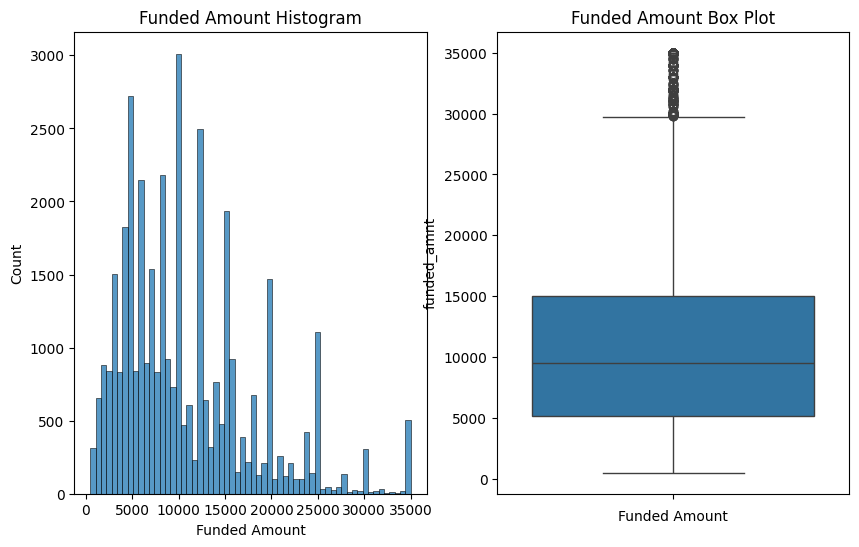

In [104]:
drawPlots (df1['funded_amnt'],"Funded Amount")


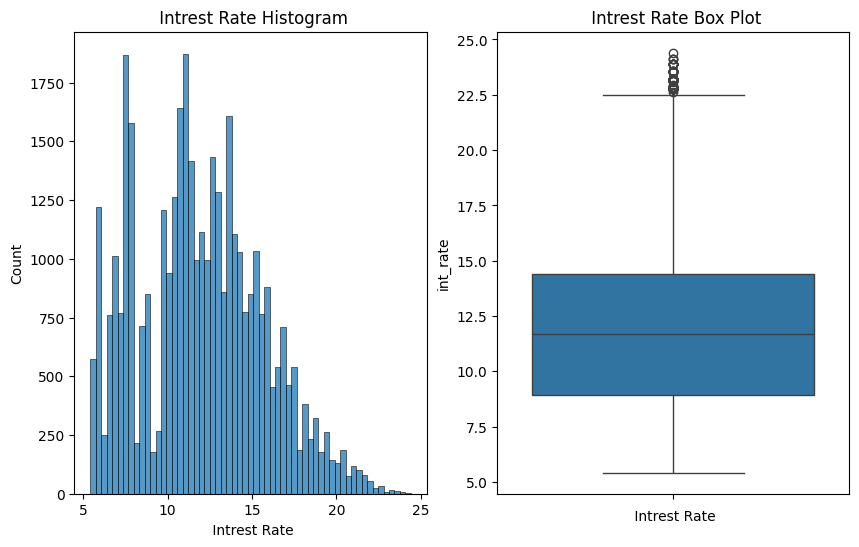

In [106]:
drawPlots (df1['int_rate']," Intrest Rate")



*   In histogram we see there are two towers ( normal distributions ). Probably data can be analyzed for Intrest rate between 5% to 8% and 9% to 25% seperately.



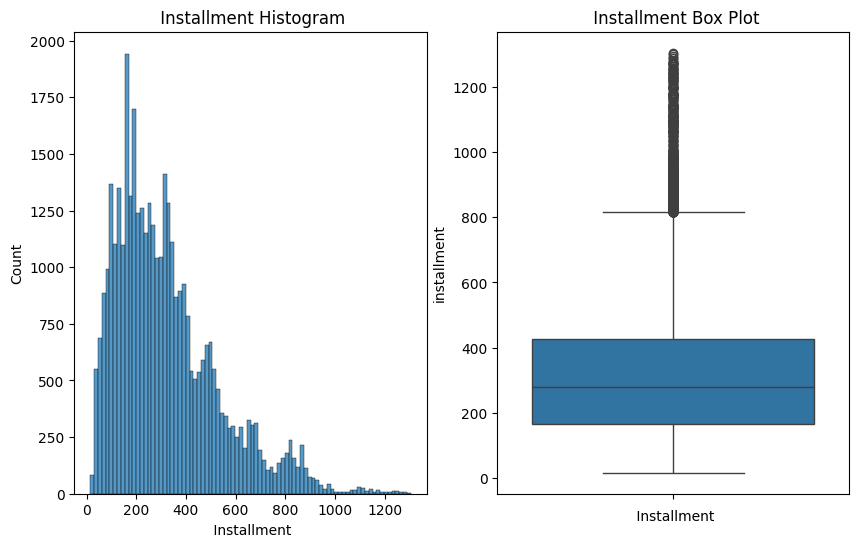

In [107]:
drawPlots (df1['installment']," Installment")

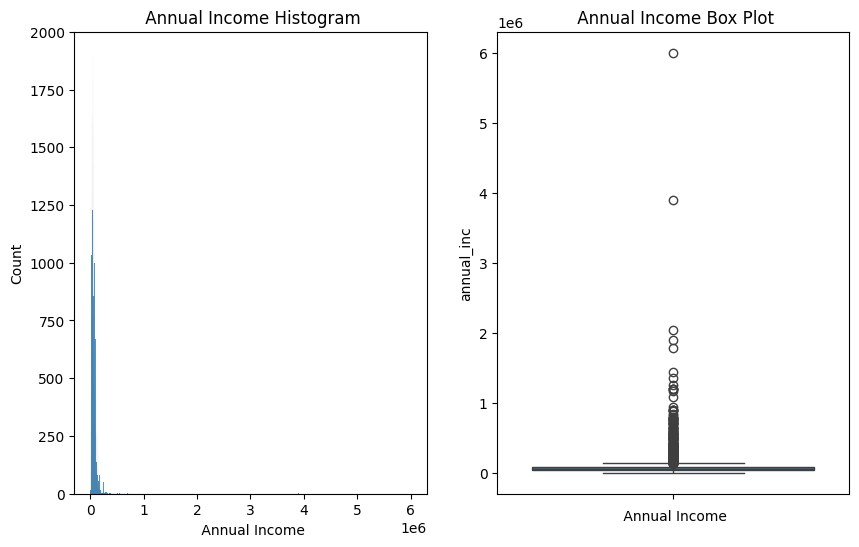

In [108]:
drawPlots (df1['annual_inc']," Annual Income")

**If we Observe, we have a outliers at 0.95 percentile, we have to remove the outliers**

In [155]:
# Calculate the 95th percentile
percentile_95 = df1['annual_inc'].quantile(0.95)

# Remove outliers
df1 = df1[df1['annual_inc'] <= percentile_95]

**After removing outliers, check the plot again**

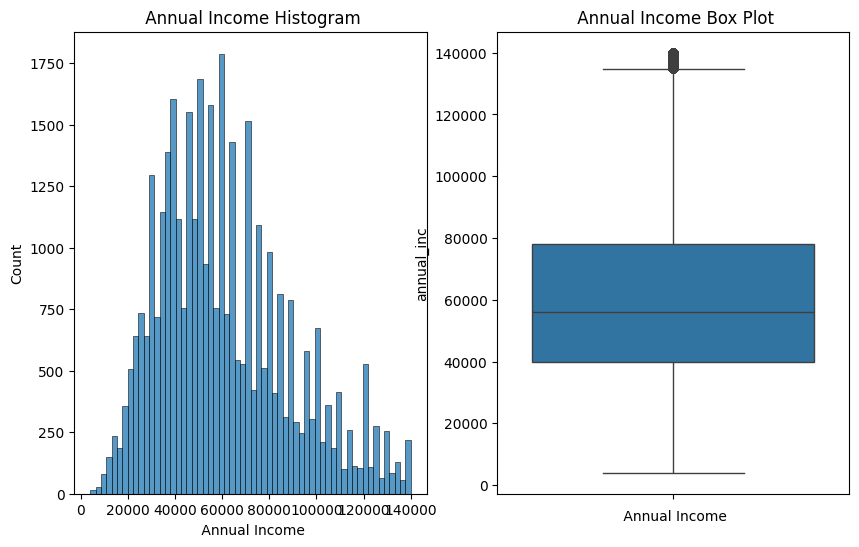

In [156]:
drawPlots (df1['annual_inc']," Annual Income")

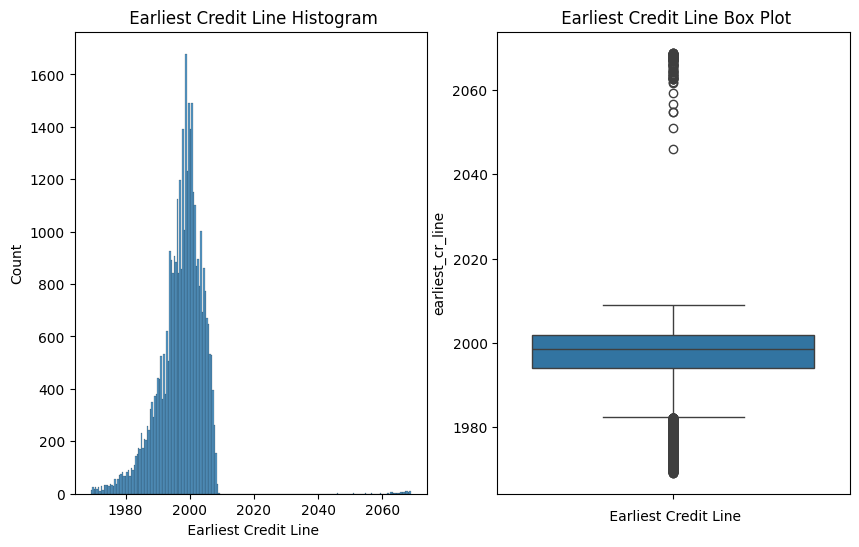

In [109]:
drawPlots (df1['earliest_cr_line']," Earliest Credit Line")

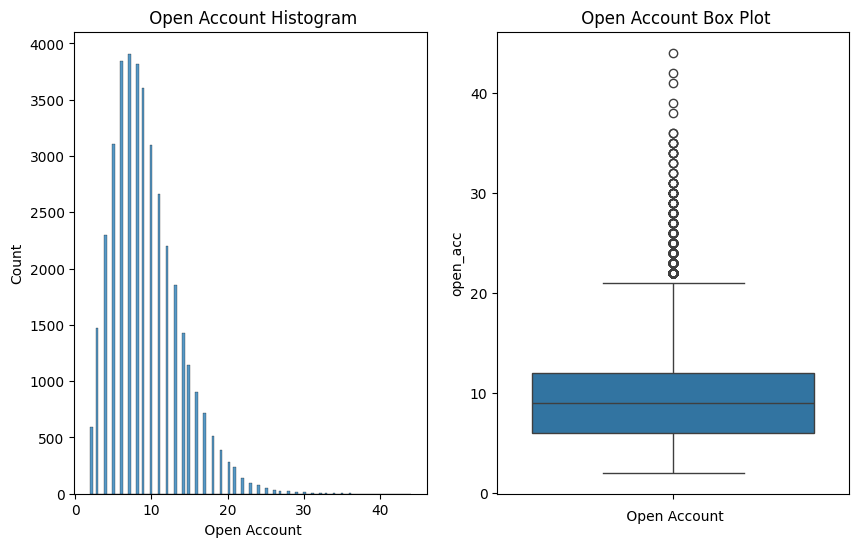

In [110]:
drawPlots (df1['open_acc']," Open Account")

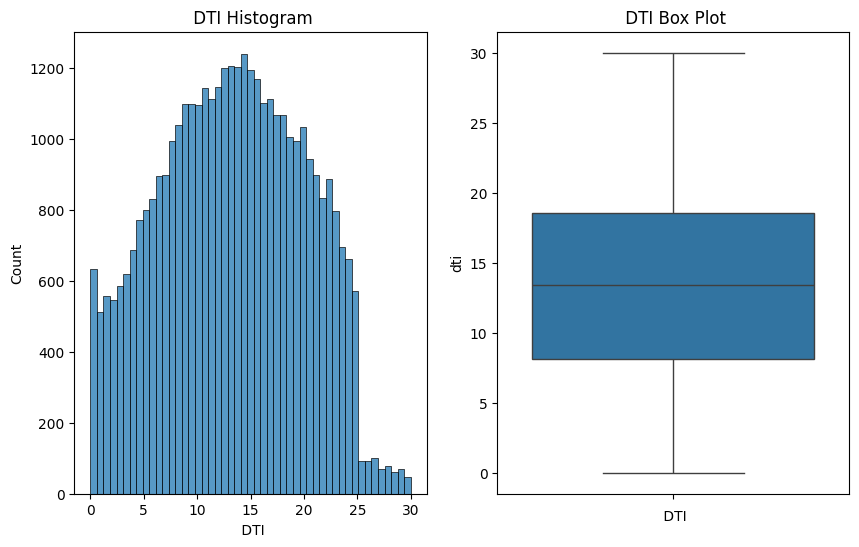

In [111]:
drawPlots (df1['dti']," DTI")

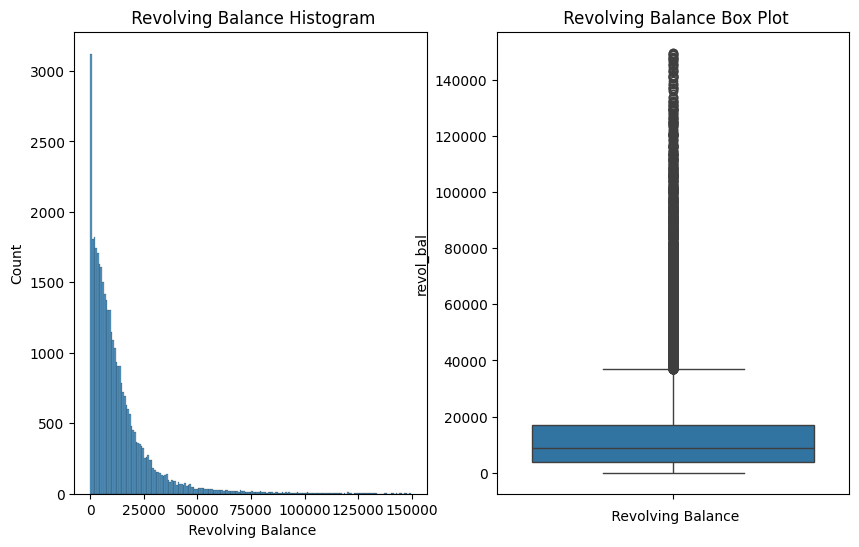

In [112]:
drawPlots (df1['revol_bal']," Revolving Balance")

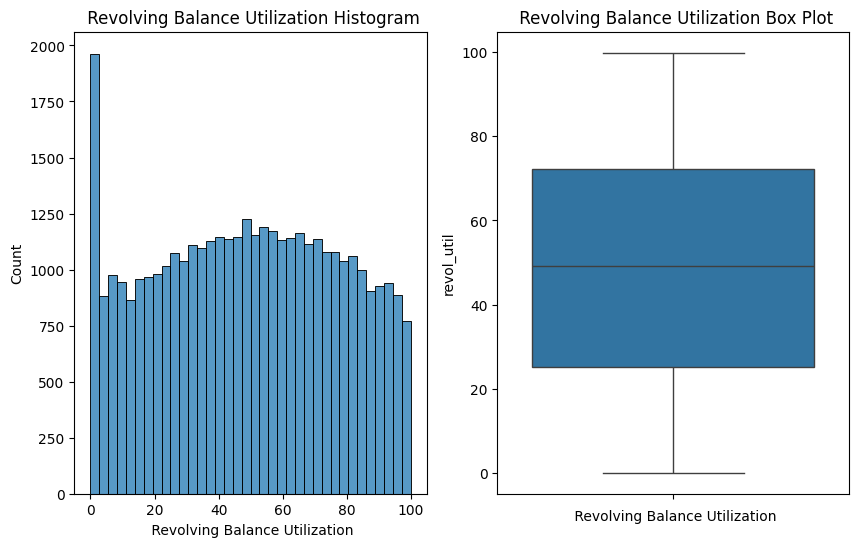

In [113]:
drawPlots (df1['revol_util']," Revolving Balance Utilization")

**Intference:** Zero Utilization of Revolving Balance us High

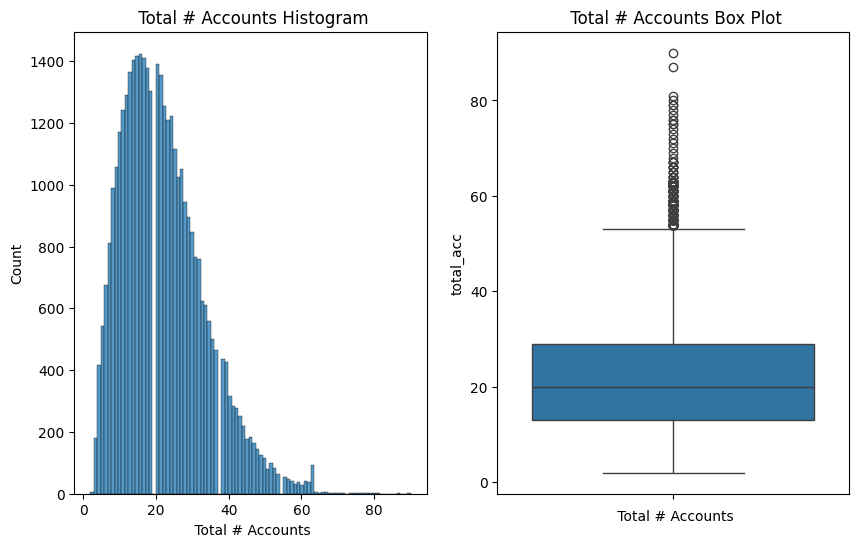

In [114]:
drawPlots (df1['total_acc']," Total # Accounts")

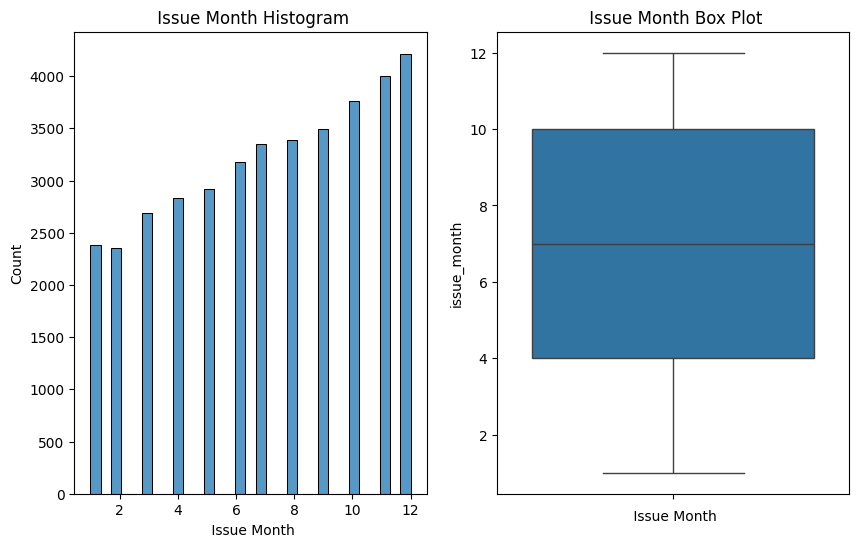

In [115]:
drawPlots (df1['issue_month']," Issue Month")

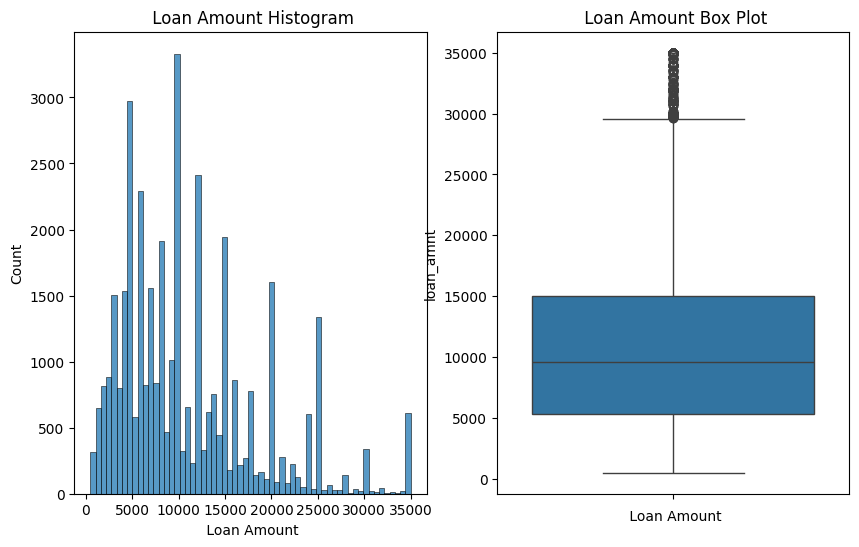

In [116]:
drawPlots (df1['loan_amnt']," Loan Amount")

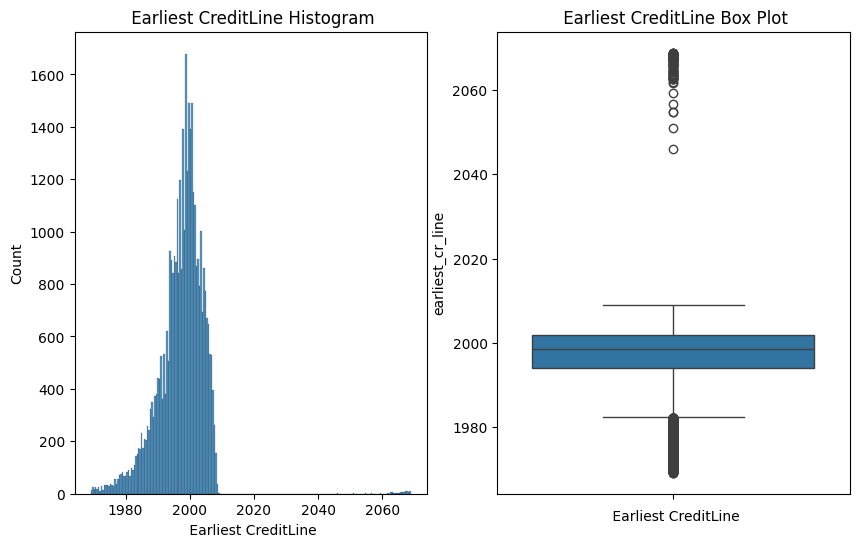

In [117]:
drawPlots (df1['earliest_cr_line']," Earliest CreditLine")

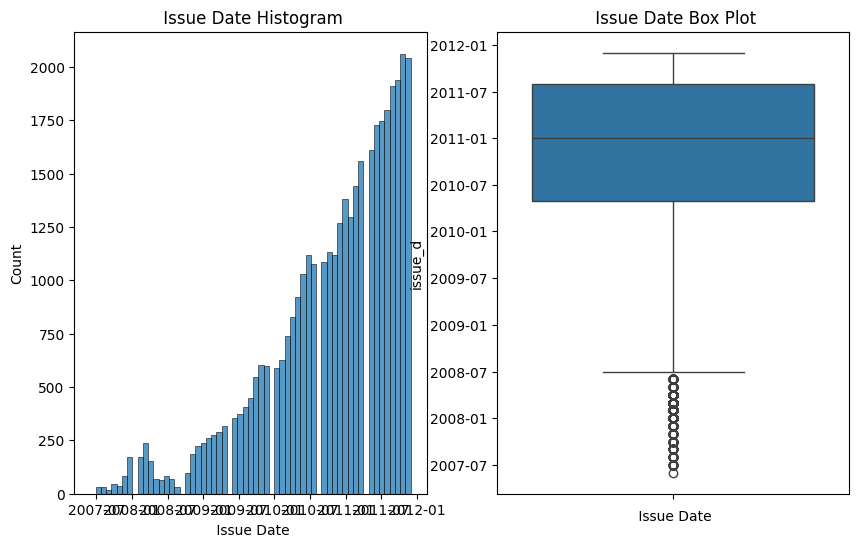

In [118]:
drawPlots (df1['issue_d']," Issue Date")

**Univariate Analysis on Categorical Data**

barplot of term


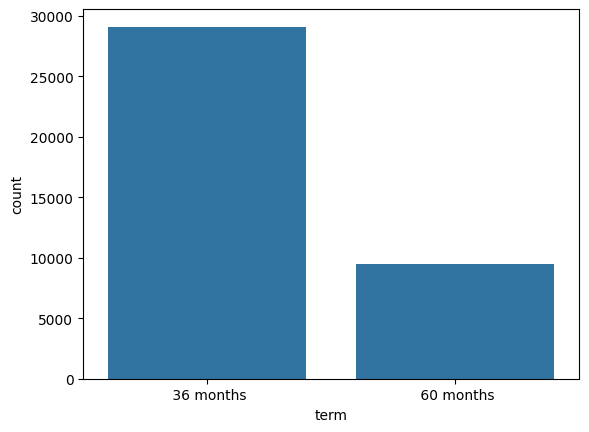

barplot of grade


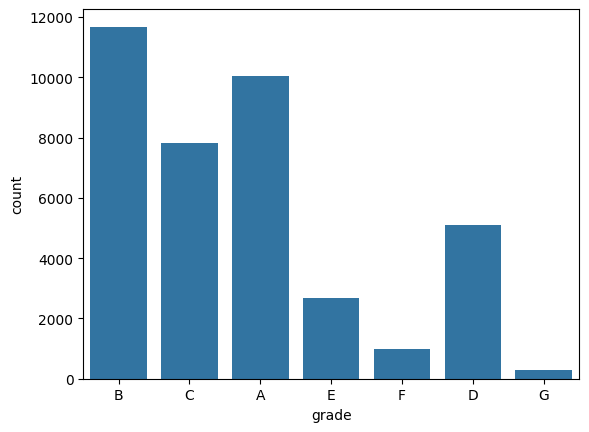

barplot of sub_grade


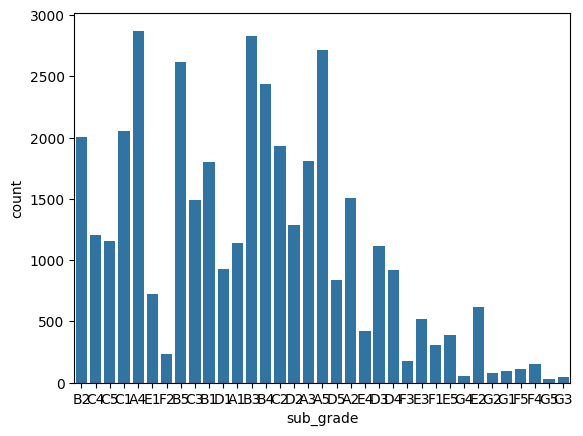

barplot of home_ownership


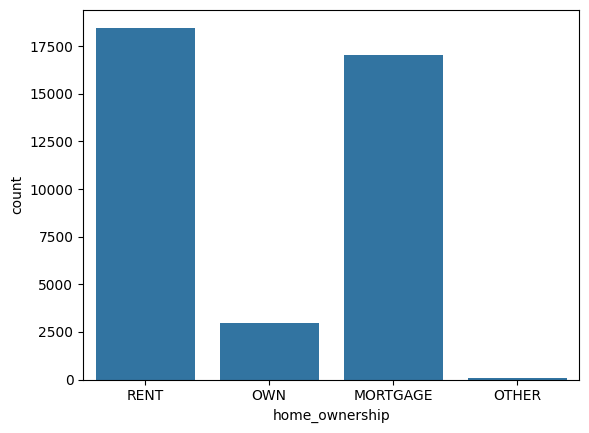

barplot of verification_status


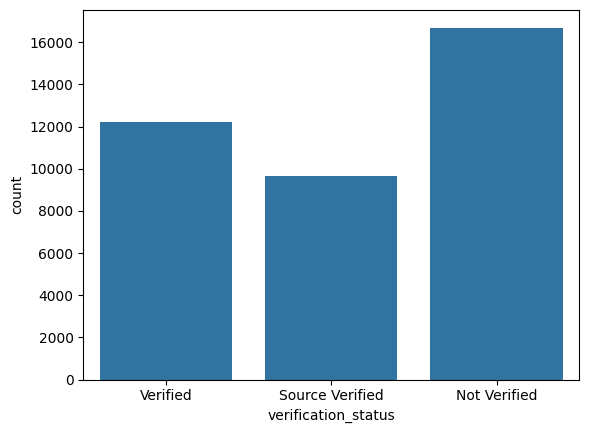

barplot of loan_status


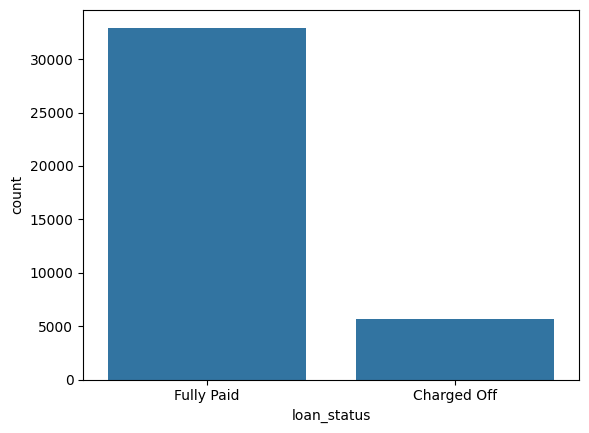

barplot of purpose


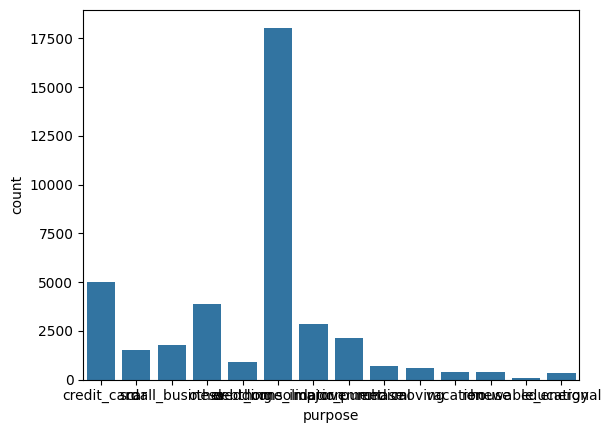

barplot of addr_state


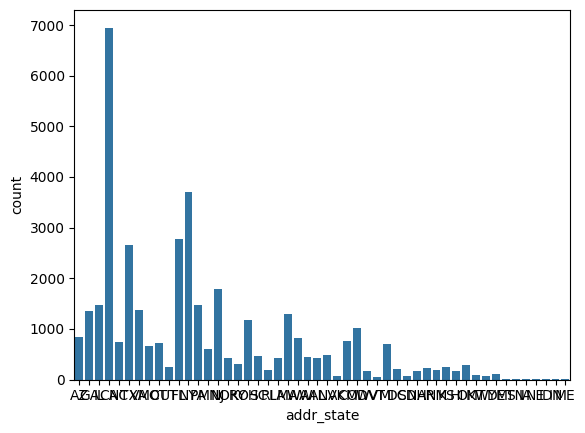

barplot of emp_length


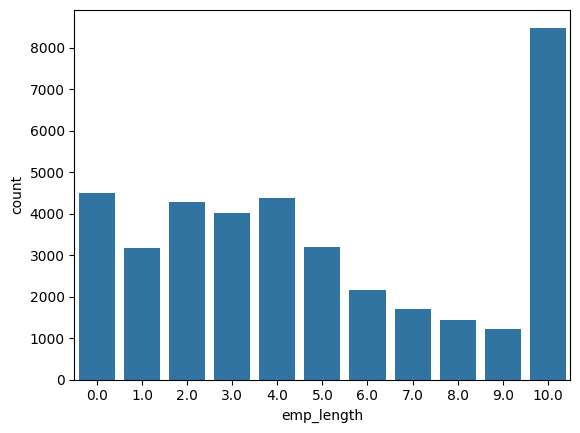

barplot of inq_last_6mths


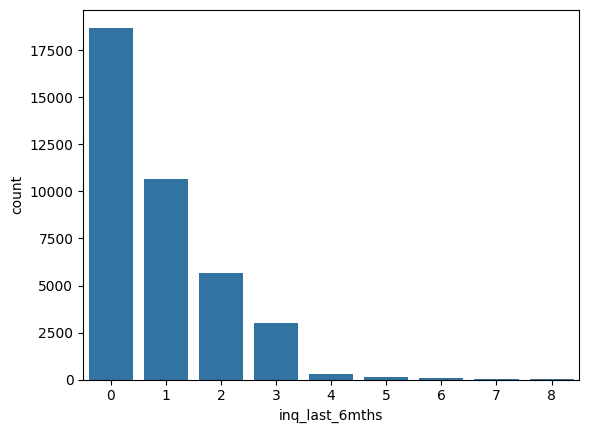

barplot of pub_rec


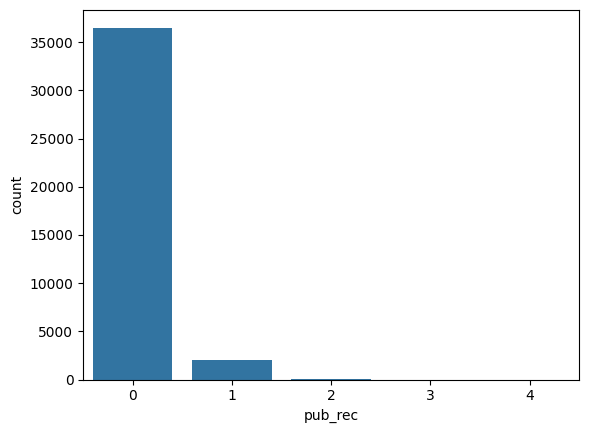

barplot of pub_rec_bankruptcies


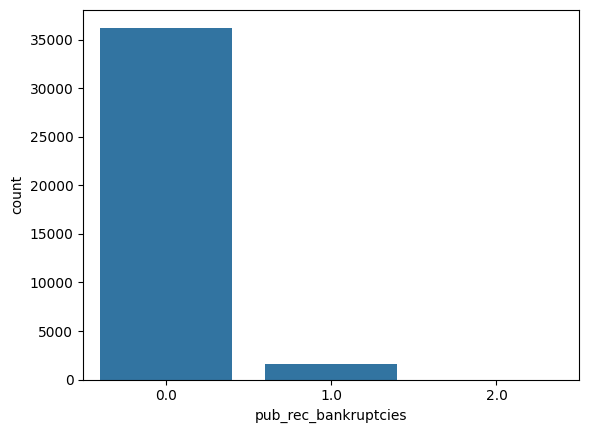

barplot of issue_year


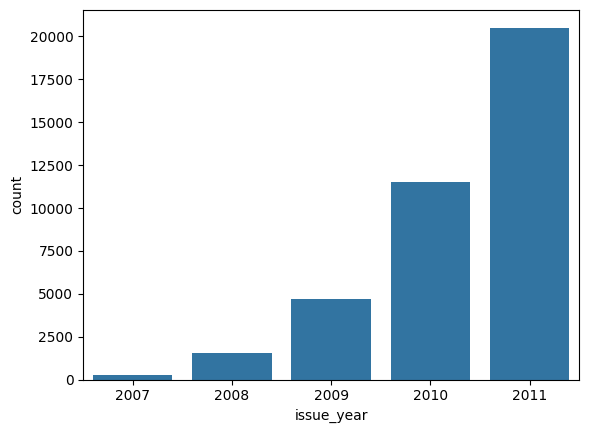

barplot of issue_month


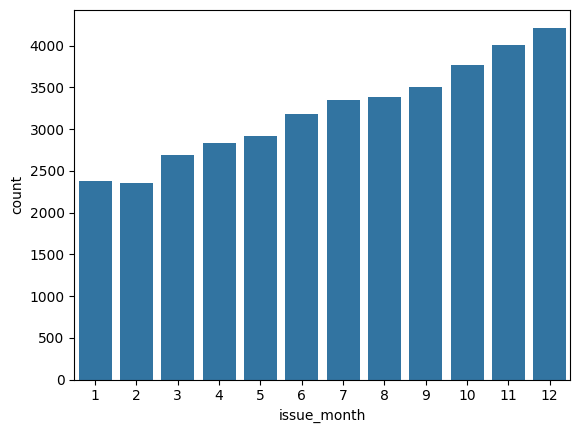

In [141]:
#Univariate analysis on Categorical data

#Plot bar plots for Categorical data
for col in cat_cols:
    print("barplot of", col)
    sns.countplot(x=df1[col])
    plt.show()

## **Observations from Univariate Analysis:**
* The number of defaulted loan is 7 times less than the number of fully paid loan.
* The majority of loan has a term of 36 months compared to 60 months.
* The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
* Majority of borrowsers have working experience greater than 10 years.
* Majority of borrowsers don't posses property and are on mortage or rent.
* About 50% of the borrowers are verified by the company or have source verified.
* Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
* A large percentage of loans are taken for debt consolidation followed by credit card.
* Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
* Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
* Majority of the borrowers have no record of Public Recorded Bankruptcy.
* Majority of the loans are given in last quarter of the year.


## Bivaraite Analsyis
Bivariate analysis is a statistical method used to explore the relationship between two variables in a dataset. Unlike univariate analysis, which focuses on a single variable, bivariate analysis **examines how two variables** are related to each other.

 In bivariate analysis, the two variables being studied can be of different types:

**Numeric-Numeric:** Analyzing the relationship between two numerical variables.

**Categorical-Numeric:** Investigating the relationship between a categorical variable and a numerical variable.

**Categorical-Categorical:** Exploring the association between two categorical variables.


barplot of loanstatus funded_amnt


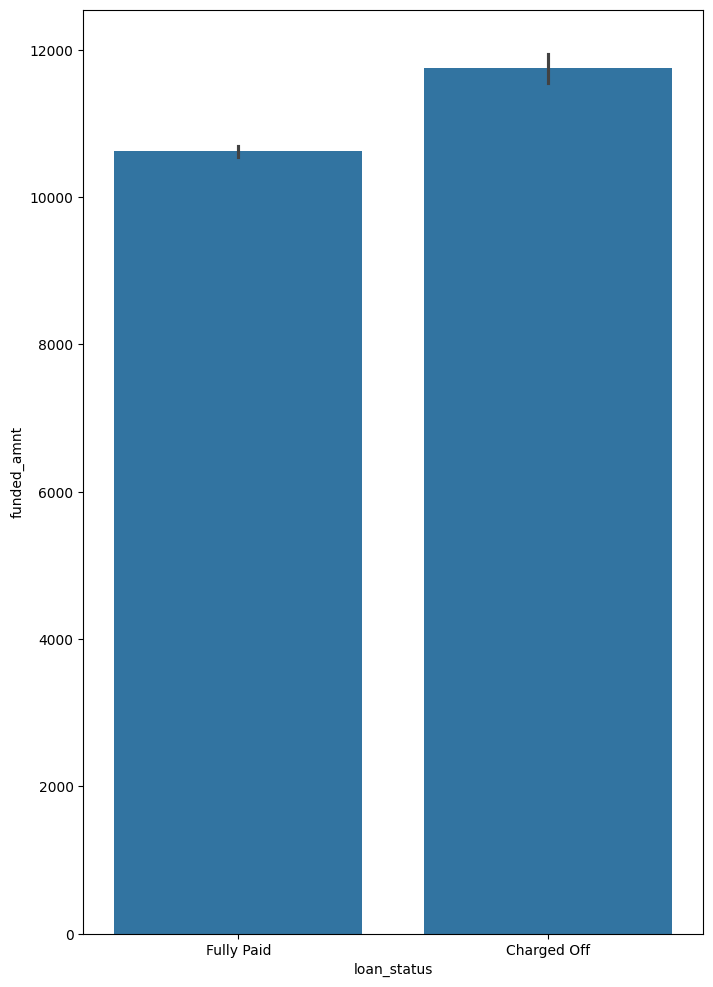

barplot of loanstatus funded_amnt_inv


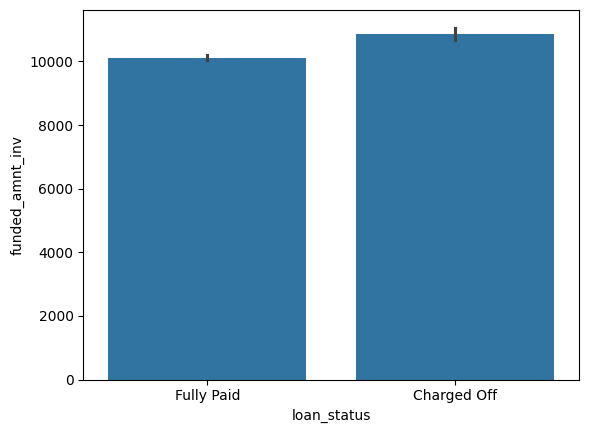

barplot of loanstatus int_rate


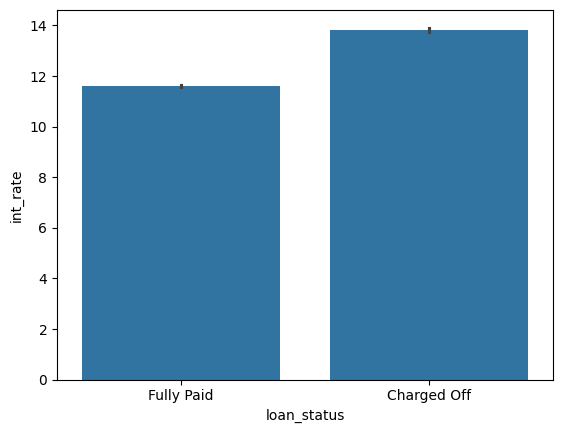

barplot of loanstatus installment


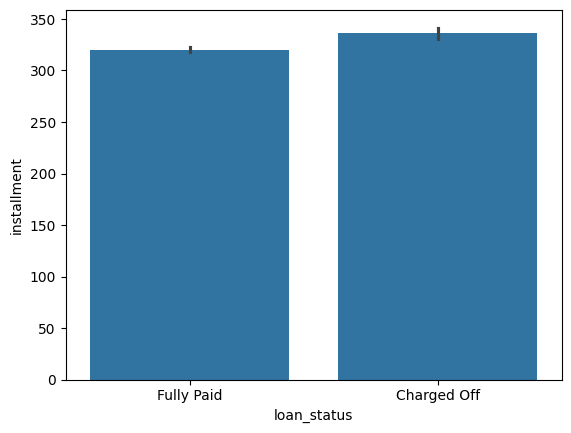

barplot of loanstatus annual_inc


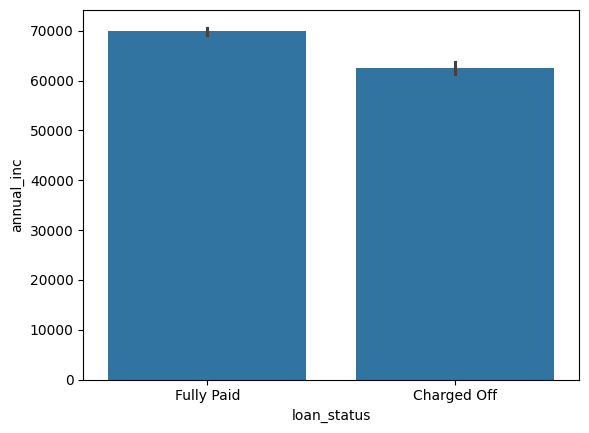

barplot of loanstatus earliest_cr_line


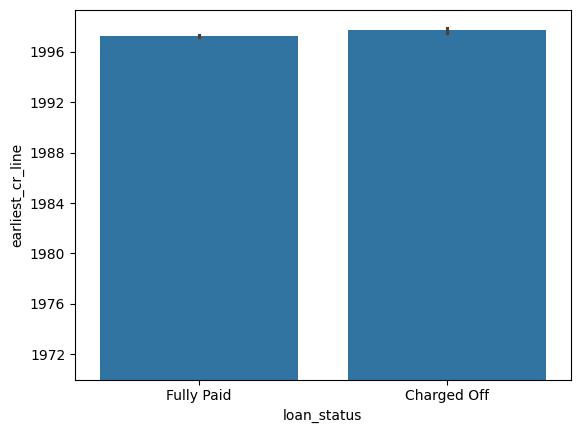

barplot of loanstatus open_acc


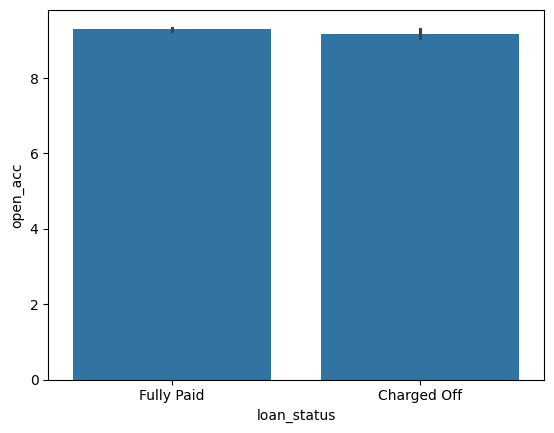

barplot of loanstatus dti


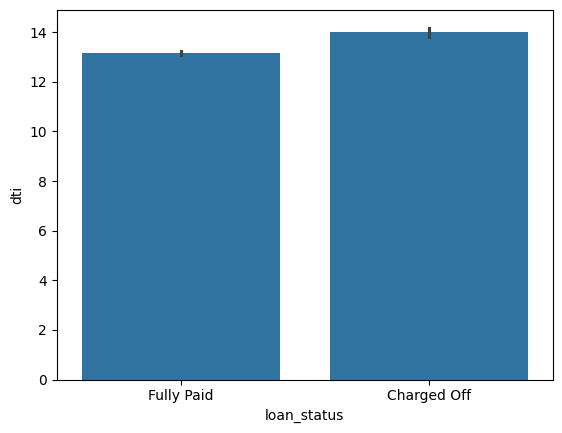

barplot of loanstatus revol_bal


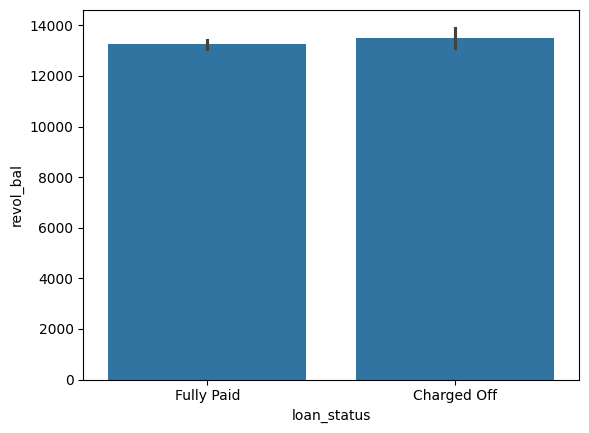

barplot of loanstatus revol_util


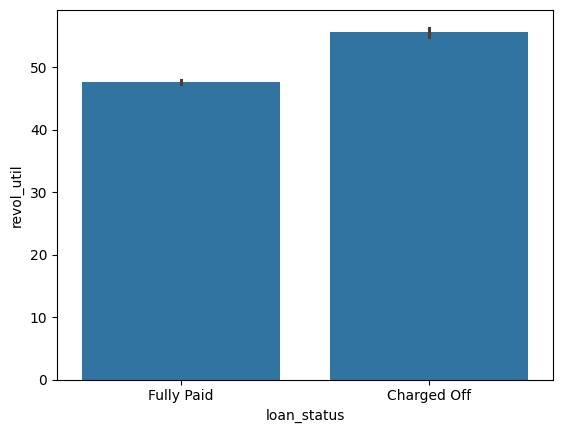

barplot of loanstatus total_acc


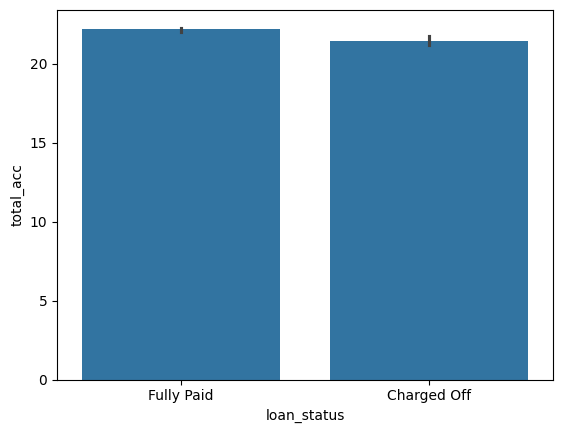

barplot of loanstatus loan_amnt


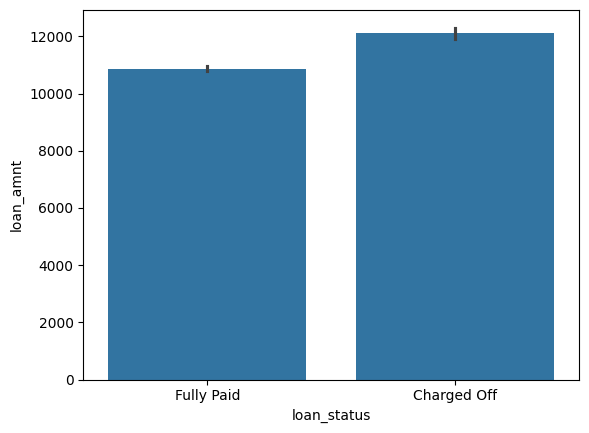

barplot of loanstatus earliest_cr_line


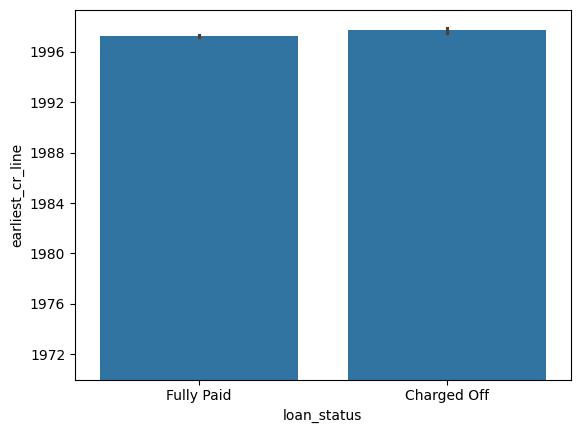

barplot of loanstatus issue_d


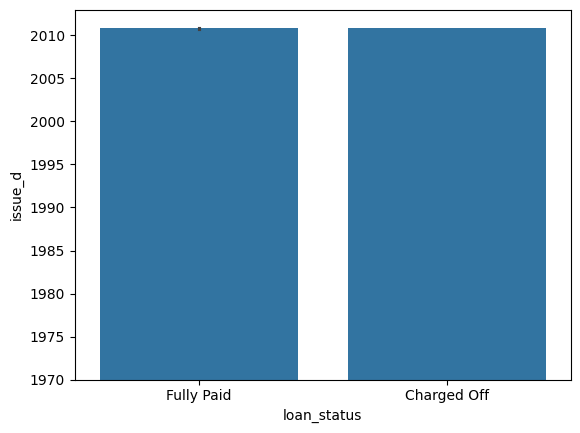

In [152]:
#For numerical vs categorical variables
plt.figure(figsize=(8,12))
for col in num_cols:
    print("barplot of loanstatus",col)
    sns.barplot(x=df1['loan_status'],y=df1[col])
    plt.show()

bar plot of loan_status vs term


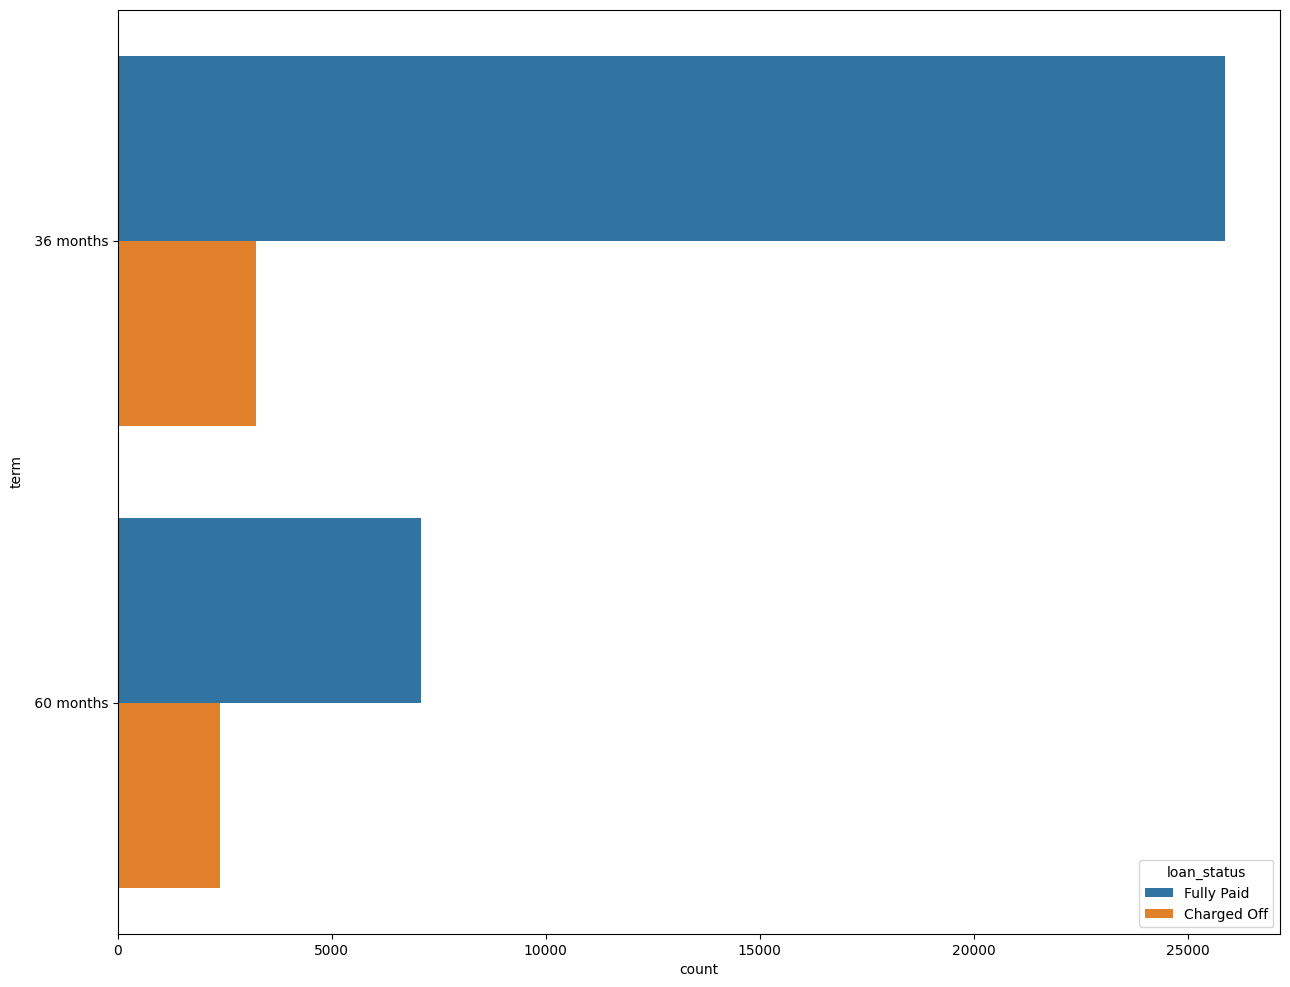

bar plot of loan_status vs grade


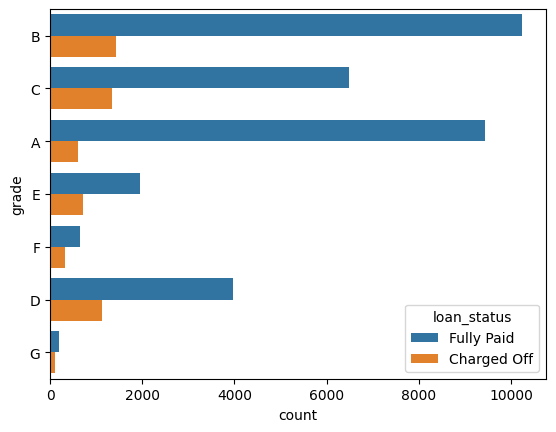

bar plot of loan_status vs sub_grade


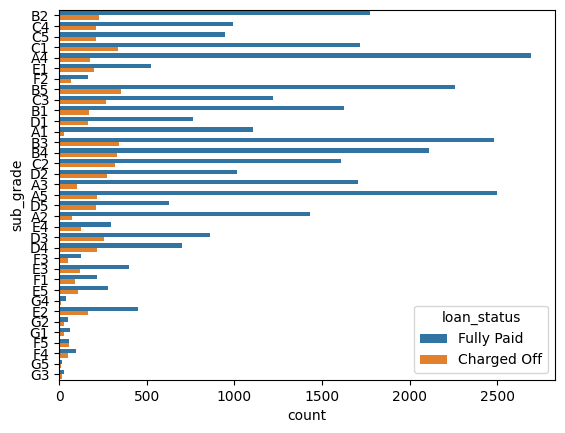

bar plot of loan_status vs home_ownership


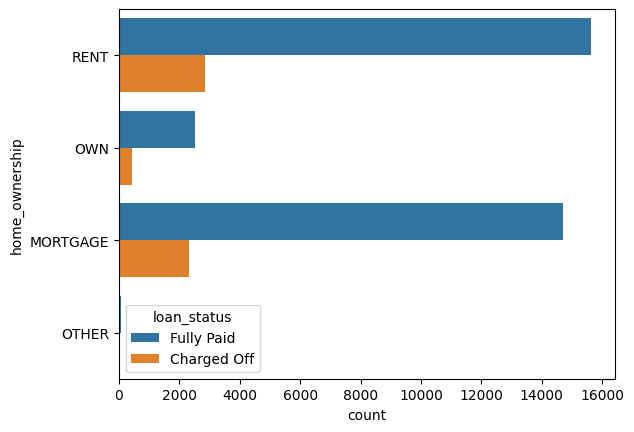

bar plot of loan_status vs verification_status


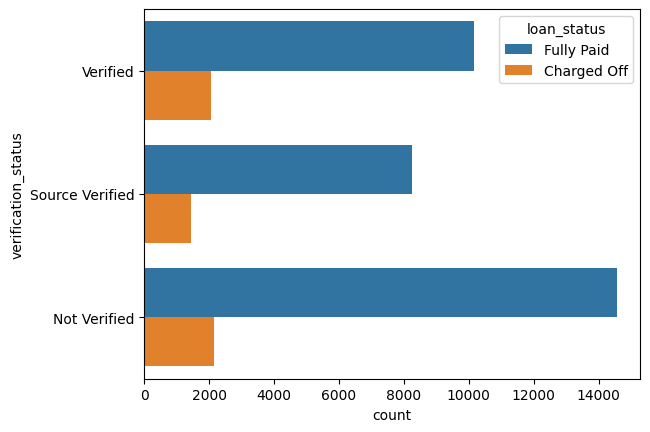

bar plot of loan_status vs loan_status


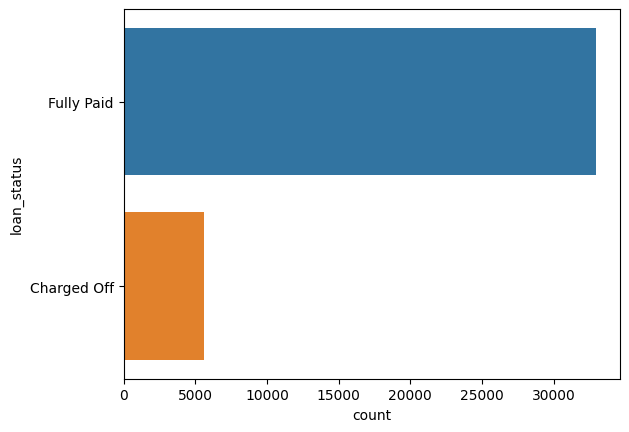

bar plot of loan_status vs purpose


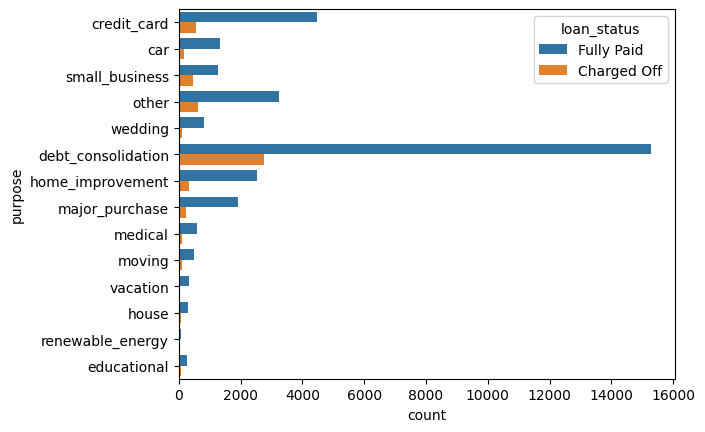

bar plot of loan_status vs addr_state


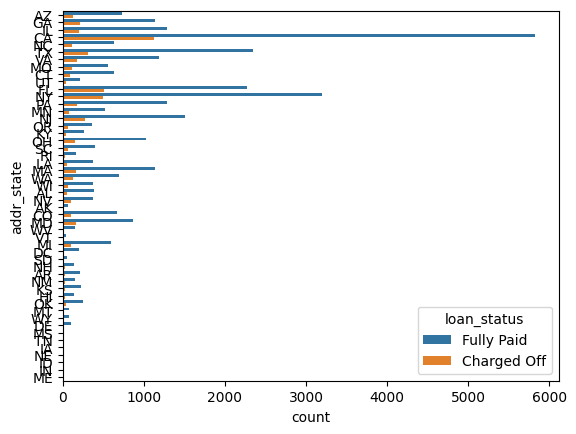

bar plot of loan_status vs emp_length


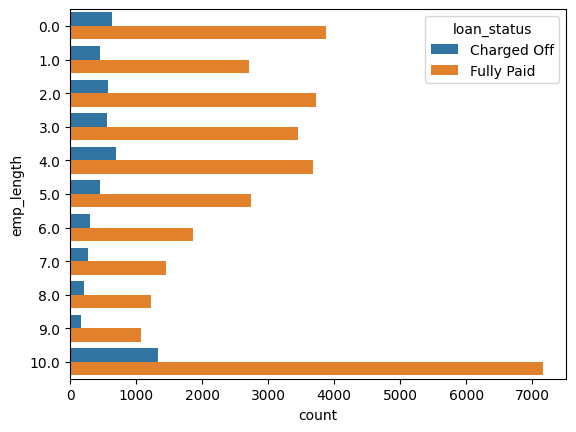

bar plot of loan_status vs inq_last_6mths


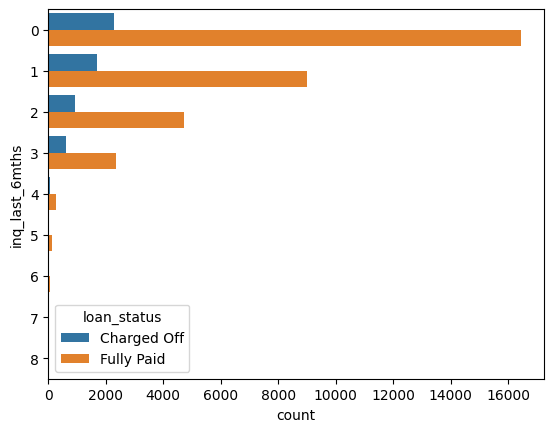

bar plot of loan_status vs pub_rec


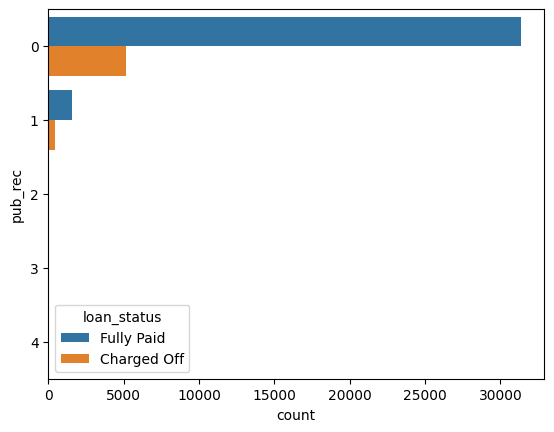

bar plot of loan_status vs pub_rec_bankruptcies


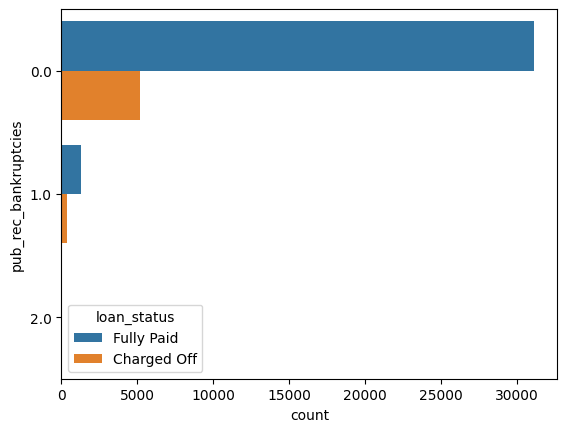

bar plot of loan_status vs issue_year


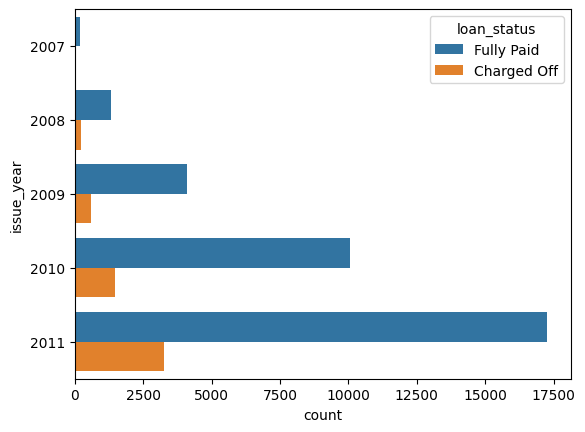

bar plot of loan_status vs issue_month


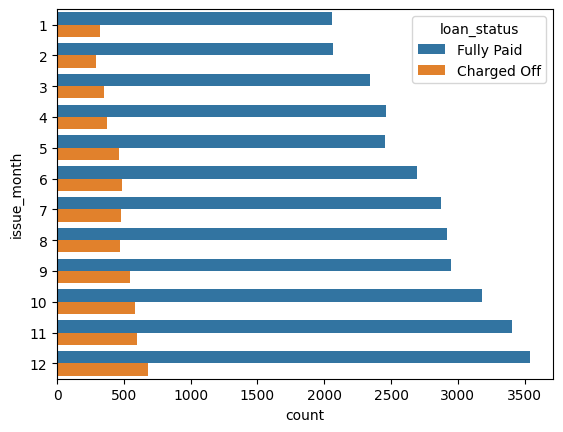

In [131]:
# For categorical vs categorical variables: Plot stacked bar plot
plt.figure(figsize=(15,12))
for col in cat_cols:
    print("bar plot of loan_status vs",col)
    sns.countplot(y=df1[col],hue=df1['loan_status'])
    plt.show()

 **Bivaraites analysis on other column combinations for more observations**

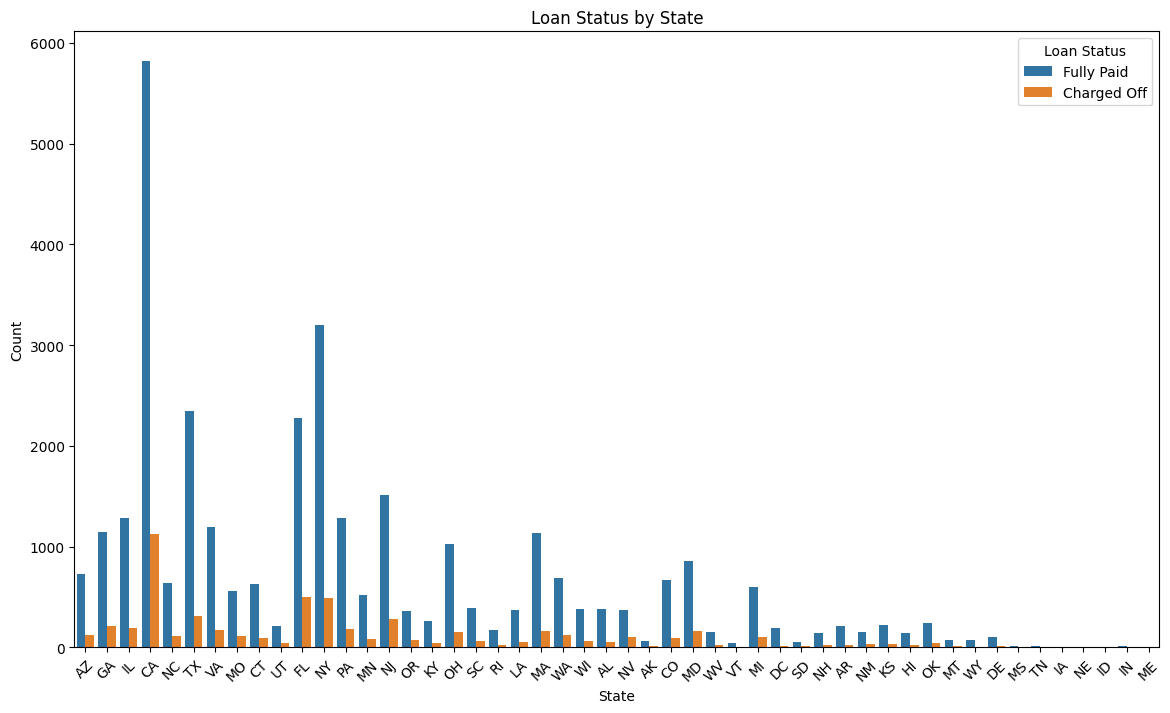

In [143]:
# More Bivaraites analysis for more observations
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.countplot(x='addr_state', hue='loan_status', data=df1)

# Add labels and title
plt.title('Loan Status by State')
plt.xlabel('State')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.legend(title='Loan Status')
plt.show()

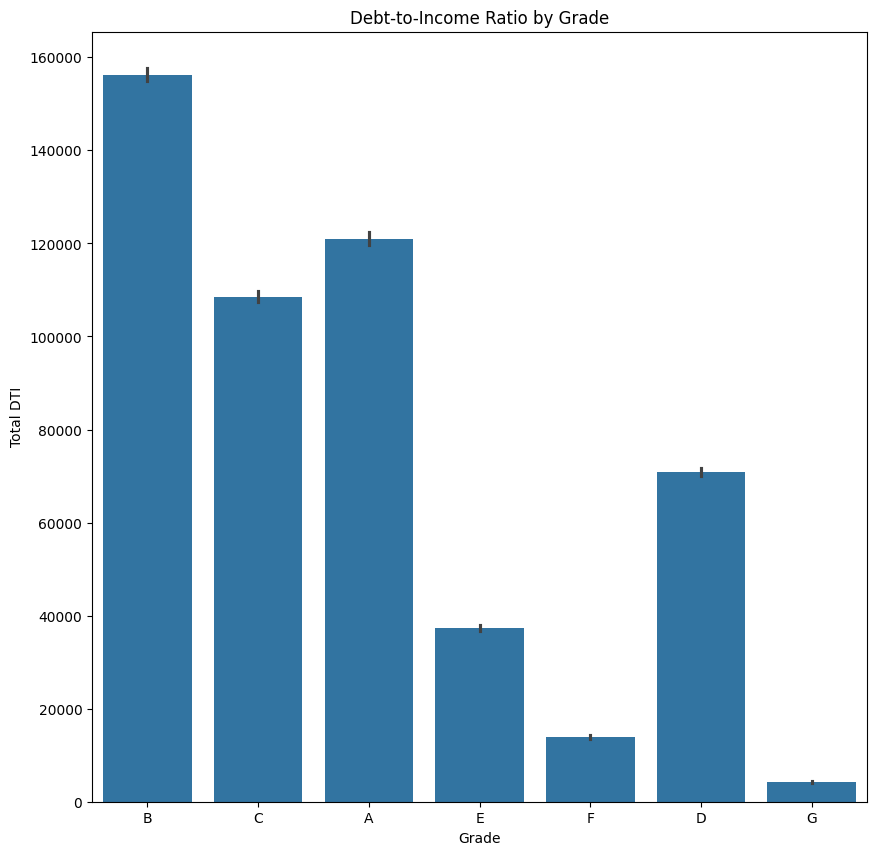

In [145]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Create the bar plot
sns.barplot(x='grade', y='dti', data=df1, estimator=sum)

# Add labels and title
plt.title('Debt-to-Income Ratio by Grade')
plt.xlabel('Grade')
plt.ylabel('Total DTI')

# Show plot
plt.show()

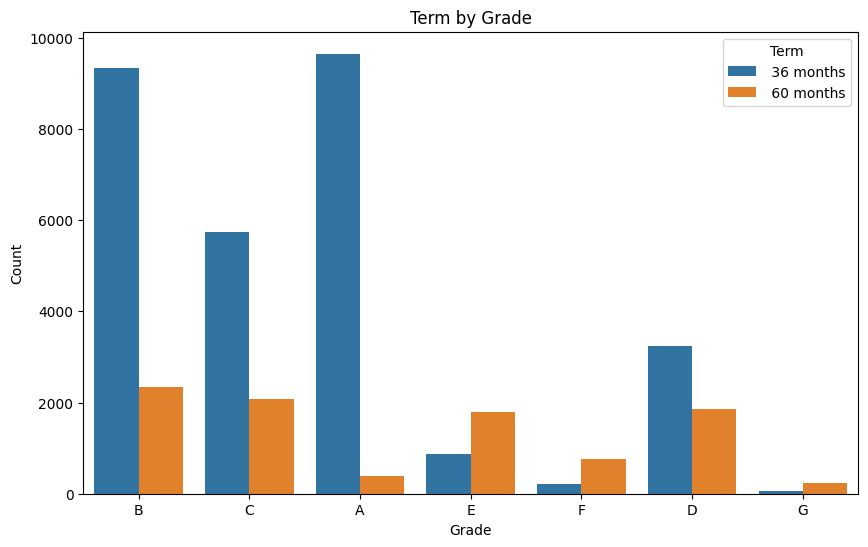

In [153]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.countplot(x='grade', hue='term', data=df1)

# Add labels and title
plt.title('Term by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

# Show plot
plt.legend(title='Term')
plt.show()

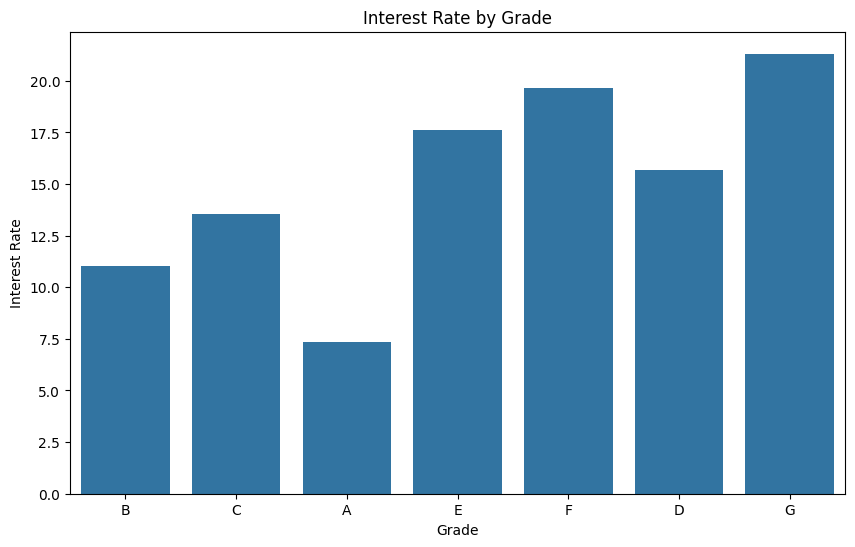

In [154]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='grade', y='int_rate', data=df1, ci=None)

# Add labels and title
plt.title('Interest Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')

# Show plot
plt.show()

## **Observations from Bivariate Analysis**
* Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
* The mean and 25% are same for both but we see larger 75% in the defaulted * * * loan which indicate large amount of loan has higher chance of defaulting.
* The 36 month term has higher chance of defaulting than 60 month term whereas
* The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
* The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
* Burrowers with less annual income are more likely to default and higher annual income are less likely to default.
* The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
* The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.
 *The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
* The Grade represent risk factor thus we can say interst rate increases with the risk.
* The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
* The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

## Multivariate Analysis
Multivariate analysis is a statistical method used to analyze data involving multiple variables simultaneously.

**For all Numeric columns plot a heat map and identify the corelation**

* Correlation represents strength of relationship between variables
* Correlation lies in the range of -1 to 1*
* Negative correlation  (0 to -1) shows inverse relationship*
* Positive correlation (0 to 1) shows direct relationship*
* 0 correlation represents no relationship. *italicized text*

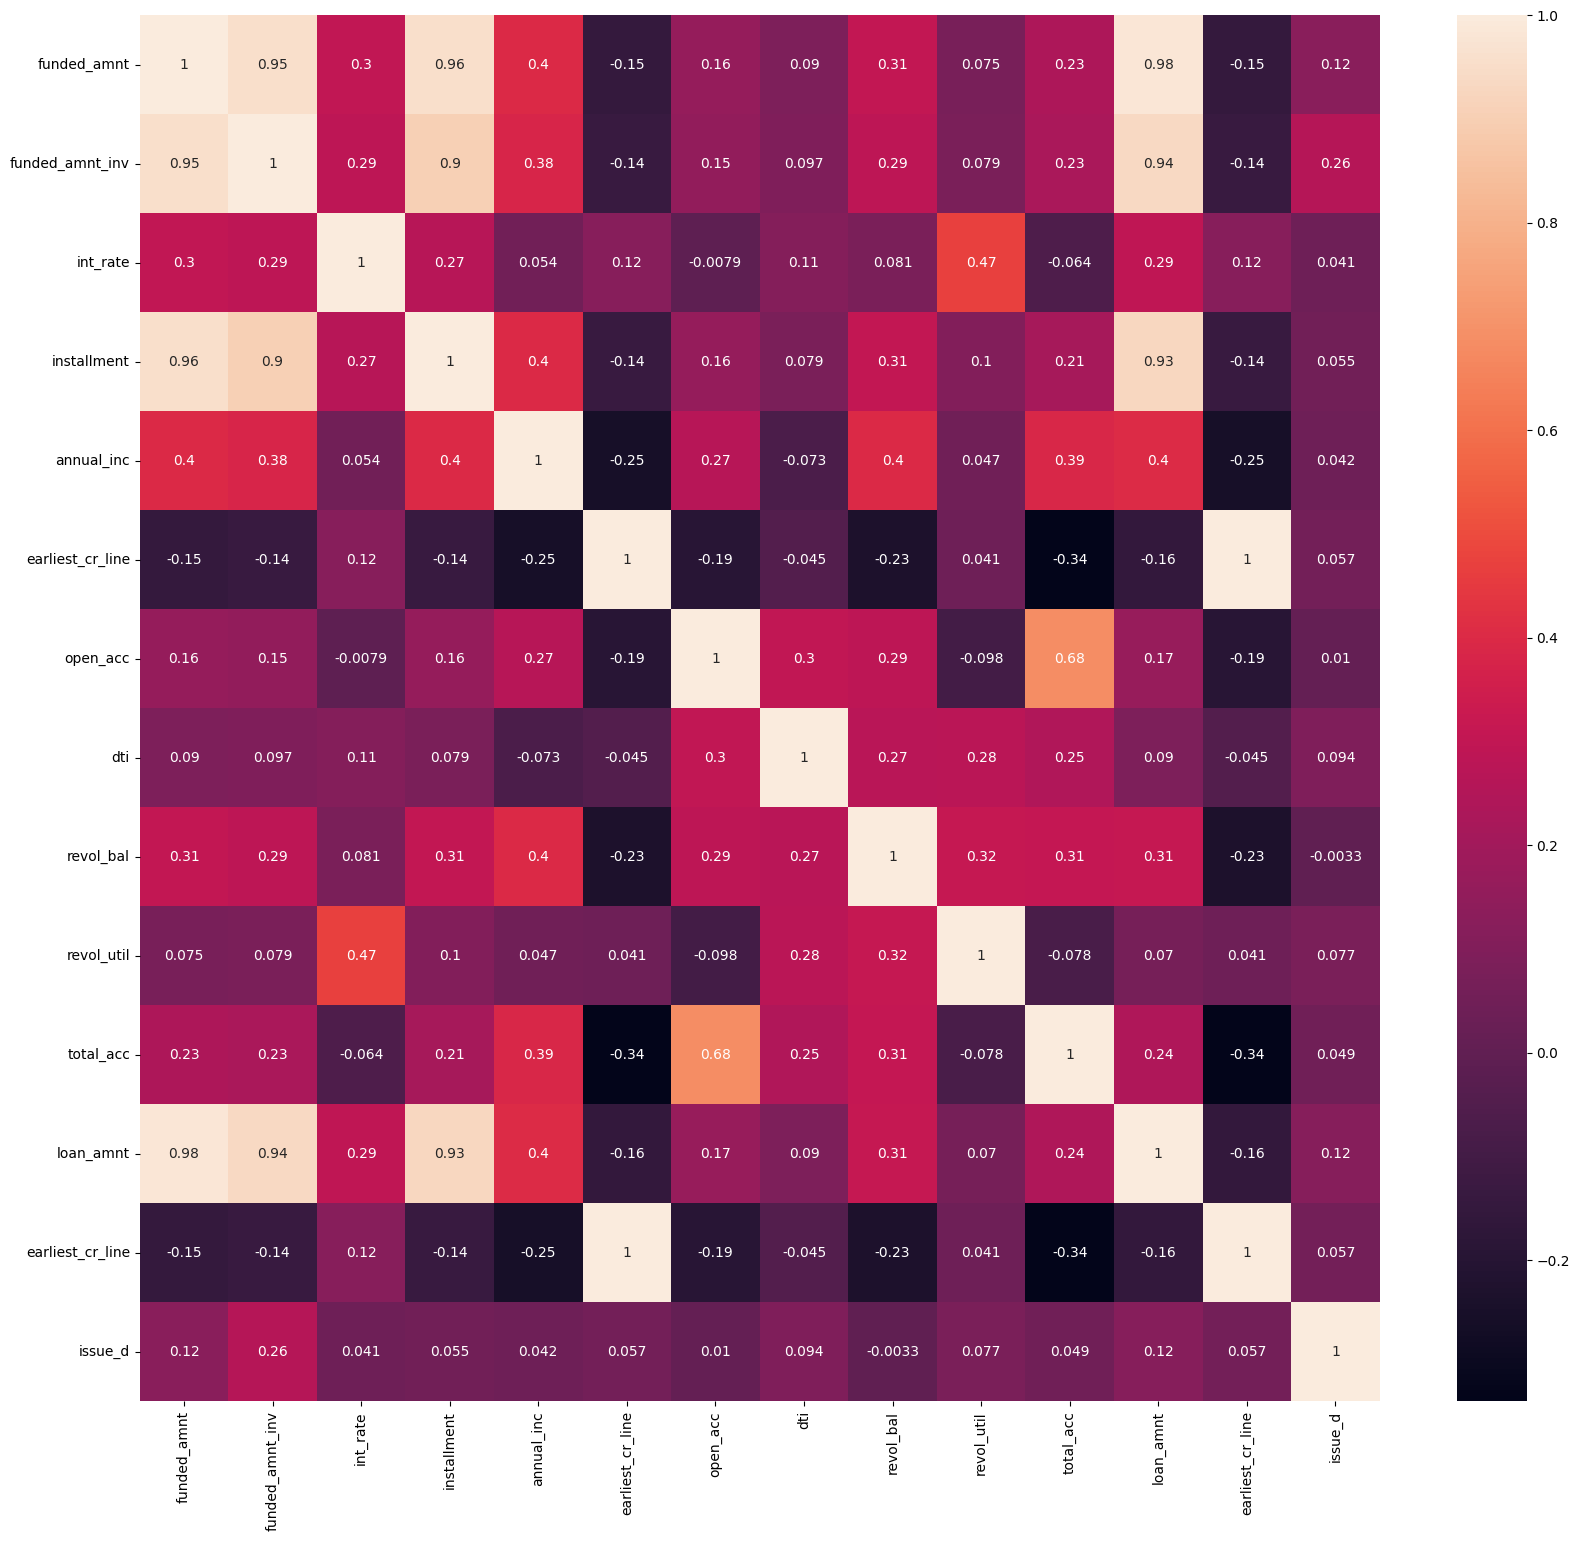

In [164]:
# Numerical variables: Compute and visualize correlation matrix
numerical_data=df1[num_cols]
plt.figure(figsize=(20,18))
sns.heatmap(numerical_data.corr(),annot=True)
plt.show()

# Step 6: Conclusion